# Practica Calificada 3
## Problema 2
$a)$ Encuentre una solución para $f(x) = 0$ con una precisión de $10^{−5}$ utilizando el método de Newton con $p_0 = 0.5$ y la regla de Simpson compuesta.

In [1]:
from sympy import symbols,integrate, log, exp, sin, diff
import numpy as np

def MetodoDeNewton(g,dg,p0,tol,N0):
  i = 1
  while(i<=N0):
    p = p0-g(p0)/dg.subs(t,p0)
    if abs(p-p0)<tol:
      return p
    else:
      i = i+1
      p0 = p
  print("El metodo fallo despues de ",N0," iteraciones.")

def Simpson(a,b,n,f):
  h = (b-a)/n
  t0 = [a+i*h for i in range(n+1)]
  suma = sum(2*f.subs(t,t0[2*j]) + 4*f.subs(t,t0[2*j-1]) for j in range(1,int(n/2)) )
  suma = f.subs(t,t0[0]) + suma + 4*f.subs(t,t0[n-1]) + f.subs(t,t0[n])
  return h*suma/3

In [2]:
t = symbols('t')
f = exp(-t**2/2)/np.sqrt(2*np.pi)

Hallamos el $n$ adecuado para tener un error de $10^{-5}$

In [3]:
diff(f, t, 2)

0.398942280401433*(t**2 - 1)*exp(-t**2/2)

Comencemos acotando la segunda derivada de la funcion $f$
\begin{align}
|f^{(2)}(t)|&= 0.39894(t^2-1)e^{-t^2/2}\\
&\leq 0.39894 \cdot 2e^{-1.5}\\
& = 0.1780
\end{align}
Hagamos nuestra tolerancia $10^{-5}$ y asi
\begin{align}
 &\frac{h^3}{12}n \cdot 0.1780 < 10^{-5} \\
\rightarrow\; & h^3n < 0.000674
\end{align}
Como $h=\frac{(x-0)}{n}$, entonces $n>38.5174\cdot x^{1.5}  $

In [24]:
def f1(x):
  # Como calculamos anteriormente: n> 38.5185*x^{1.5}
  n = round(38.5174*(x**1.5),0) # El numero entero truncado
  integral = Simpson(0,x,int(n)+1,f)
  return integral - 0.45

# Nuestra funcion g es \int f - 0.45 y su derivada, dg, es la funcion f
sol = MetodoDeNewton(f1,f,0.5,1E-5,100)

print("La solucion de la ecuacion por el metodo de Newton, usando la regla de Simpson compuesta es:",sol)

La solucion de la ecuacion por el metodo de Newton, usando la regla de Simpson compuesta es: 1.64485362651616


In [26]:
# Hallando la integral real de f
integrate(f, (t, 0, 1.64485362651616)).round(13)

0.4499999999551

$b)$ Repita $(a)$ usando la regla del trapecio compuesta en lugar de la regla de Simpson compuesta.

In [13]:
def Trapecio(a,b,n,f):
  h = (b-a)/n
  t0 = [a+i*h for i in range(n+1)]
  suma = sum(f.subs(t,t0[j]) + f.subs(t,t0[j+1]) for j in range(n))
  return h*suma/2

Hallamos el $n$ adecuado para tener un error de $10^{-5}$

In [14]:
diff(f, t, 4)

0.398942280401433*(t**4 - 6*t**2 + 3)*exp(-t**2/2)

Comencemos acotando la segunda derivada de la funcion $f$
\begin{align}
|f^{(4)}(t)|&= 0.39894(t^4-6t^2+3)e^{-t^2/2}\\
&\leq 0.39894 \cdot (8-4\cdot \sqrt{10}) e^{-\frac{5-\sqrt{10}}{2}}\\
& = 0.7380
\end{align}
Hagamos nuestra tolerancia $10^{-5}$ y asi
\begin{align}
\frac{h^5}{90}&\cdot 0.7380 < 10^{-5}\\
\rightarrow & h^5 < 0.001219
\end{align}
Como $h=\frac{(x-0)}{n}$, entonces $n>3.8262\cdot x $

In [30]:
def f2(x):
  # Como calculamos anteriormente: n> 38.5185*x^{1.5}
  n = round(3.8262*(x),0)+1 # El numero entero inmediato
  # Queremos que n sea par
  if n%2==1: # si es impar escogemos el numero que sigue (par)
    n = n+1
  integral = Trapecio(0,x,int(n),f)
  return integral - 0.45

# Nuestra funcion g es la \int f - 0.45 y su derivada, dg, es la funcion f
sol2 = MetodoDeNewton(f2,f,0.5,1E-5,100)
print("La solucion de la ecuacion por el metodo de Newton, usando la regla del Trapecio compuesta es:",sol2)

La solucion de la ecuacion por el metodo de Newton, usando la regla del Trapecio compuesta es: 1.65068303451151


In [32]:
# Hallando la integral real de f
integrate(f, (t, 0, 1.65068303451151)).round(13)

0.4505983430875

## Problema 4
$a)$ Aproxime $y(5)$ usando el método de Euler con tamaño de subintervalos $h = 0.2, h = 0.1$ y $h = 0.05$.

In [17]:
import numpy as np
import pandas as pd
def MetodoEuler(a,b,N,alpha):
  # Paso 1
  h = (b-a)/N
  t = a
  w = alpha
  df = pd.DataFrame(np.array([[t, w, y(t), y(t)-w]]),
                   columns=['t', 'w', 'y', "error"])
  # Paso 2
  for i in range(1,N+1):
    # Paso 3
    w += h*f3(t,w) # Calcula w_i
    t = a+h*i  # Calcula t_i
    yi = y(t)
    error = yi-w
    # Paso 4
    df.loc[len(df.index)] = [t,w,yi,error] # almacena las nuevas filas
  return df

def f3(t,y):
  return -y+t+1
def y(t):
  return np.exp(-t)+t

In [18]:
# Para N=5
h5 = MetodoEuler(0,5,5,1)
h5

,t,w,y,error
0,0.0,1.0,1.000000,0.000000
1,1.0,1.0,1.367879,0.367879
2,2.0,2.0,2.135335,0.135335
3,3.0,3.0,3.049787,0.049787
4,4.0,4.0,4.018316,0.018316
5,5.0,5.0,5.006738,0.006738


In [19]:
# Para N=10
h10 = MetodoEuler(0,5,10,1)
h10

,t,w,y,error
0,0.0,1.000000,1.000000,0.000000
1,0.5,1.000000,1.106531,0.106531
2,1.0,1.250000,1.367879,0.117879
3,1.5,1.625000,1.723130,0.098130
4,2.0,2.062500,2.135335,0.072835
5,2.5,2.531250,2.582085,0.050835
6,3.0,3.015625,3.049787,0.034162
7,3.5,3.507812,3.530197,0.022385
8,4.0,4.003906,4.018316,0.014409
9,4.5,4.501953,4.511109,0.009156


In [20]:
# Para N=20
h20 = MetodoEuler(0,5,20,1)
h20

,t,w,y,error
0,0.00,1.000000,1.000000,0.000000
1,0.25,1.000000,1.028801,0.028801
2,0.50,1.062500,1.106531,0.044031
3,0.75,1.171875,1.222367,0.050492
4,1.00,1.316406,1.367879,0.051473
5,1.25,1.487305,1.536505,0.049200
6,1.50,1.677979,1.723130,0.045152
7,1.75,1.883484,1.923774,0.040290
8,2.00,2.100113,2.135335,0.035222
9,2.25,2.325085,2.355399,0.030315


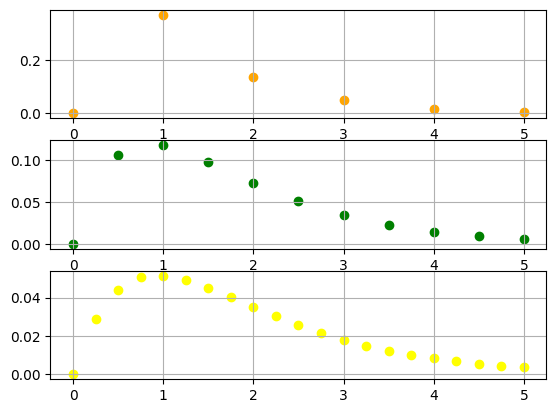

In [21]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(3,1)

# Graficando los errores:
ax[0].scatter(h5.t,h5.error, color = "orange")
ax[1].scatter(h10.t,h10.error, color = "green")
ax[2].scatter(h20.t,h20.error, color = "yellow")

# Grid
ax[0].grid()
ax[1].grid()
ax[2].grid()

# plt.show()

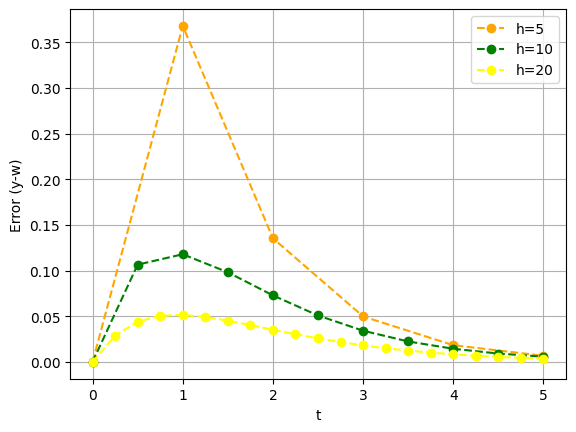

In [22]:
import matplotlib.pyplot as plt

# Otra manera de graficarlos
h5 = MetodoEuler(0,5,5,1)
h10 = MetodoEuler(0,5,10,1)
h20 = MetodoEuler(0,5,20,1)

fig, ax = plt.subplots()
plt.plot(h5.t,h5.error,"o--" ,color = "orange")
plt.plot(h10.t,h10.error,"o--", color = "green")
plt.plot(h20.t,h20.error, "o--", color = "yellow")
plt.legend(('h=5', 'h=10', 'h=20'), loc = 'upper right')

ax.grid()
plt.xlabel("t")
plt.ylabel("Error (y-w)")
plt.show()